In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Dataset/Netflix.csv')

# Basic information about the dataset

In [3]:
data.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [4]:
data.dtypes

Show_Id         object
Category        object
Title           object
Director        object
Cast            object
Country         object
Release_Date    object
Rating          object
Duration        object
Type            object
Description     object
dtype: object

In [5]:
data.shape

(7789, 11)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB


# Check for duplicate records

In [7]:
duplicates = data.duplicated().sum()
print(f"Number of duplicate records found: {duplicates}")
data.drop_duplicates(inplace=True)
print(f"Shape after removing duplicates: {data.shape}")

Number of duplicate records found: 2
Shape after removing duplicates: (7787, 11)


# Data Cleaning

In [8]:
missing_values = data.isnull().sum()
missing_values

Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
dtype: int64

In [9]:
data['Director'] = data['Director'].fillna("Unknown")
data['Cast'] = data['Cast'].fillna("Not Available")

In [10]:
country_mode = data['Country'].mode()[0]
data['Country'] = data['Country'].fillna(country_mode)

In [11]:
data['Release_Date'] = data['Release_Date'].str.strip()
data['Release_Date'] = pd.to_datetime(data['Release_Date'], errors='coerce')
data = data.dropna(subset=['Release_Date'])

In [12]:
rating_mode = data['Rating'].mode()[0]
data['Rating'] = data['Rating'].fillna(rating_mode)

In [13]:
print("Missing values after treatment:")
data.isnull().sum()

Missing values after treatment:


Show_Id         0
Category        0
Title           0
Director        0
Cast            0
Country         0
Release_Date    0
Rating          0
Duration        0
Type            0
Description     0
dtype: int64

In [14]:
data.dtypes

Show_Id                 object
Category                object
Title                   object
Director                object
Cast                    object
Country                 object
Release_Date    datetime64[ns]
Rating                  object
Duration                object
Type                    object
Description             object
dtype: object

In [15]:
data['Date_N'] = pd.to_datetime(data['Release_Date'], errors='coerce')
data['Year'] = data['Date_N'].dt.year
data['Month'] = data['Date_N'].dt.month_name()

# Content Type Distribution


Content Type Distribution:


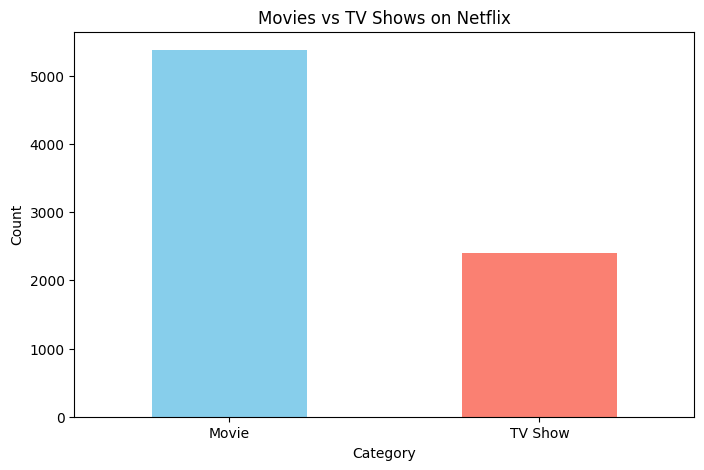

In [16]:
print("\nContent Type Distribution:")
content_counts = data['Category'].value_counts()
content_counts

plt.figure(figsize=(8, 5))
content_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Movies vs TV Shows on Netflix')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Year with highest number of releases


Year with highest number of releases:


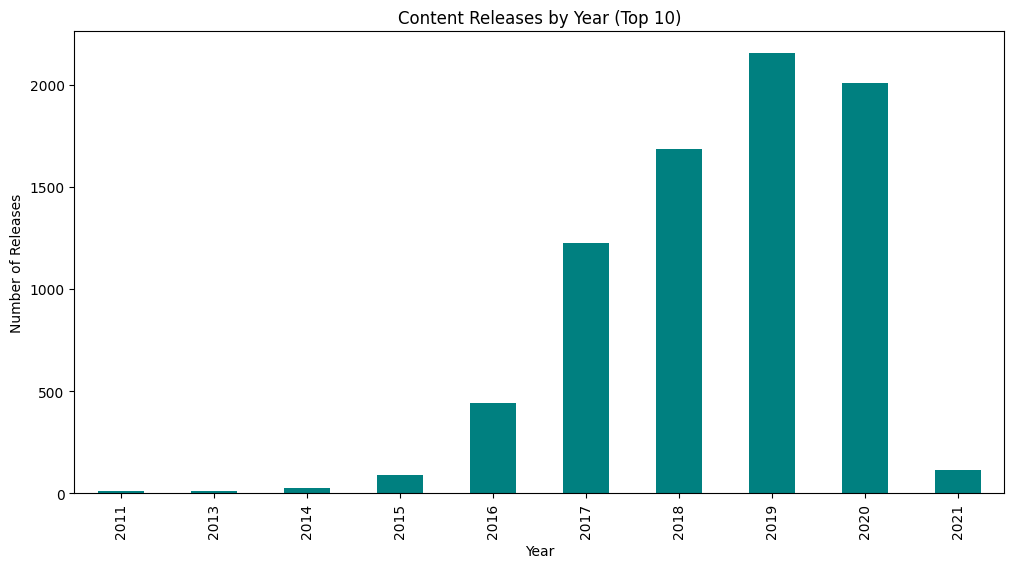

In [17]:
print("\nYear with highest number of releases:")
yearly_counts = data['Year'].value_counts().head(10)
yearly_counts

plt.figure(figsize=(12, 6))
yearly_counts.sort_index().plot(kind='bar', color='teal')
plt.title('Content Releases by Year (Top 10)')
plt.xlabel('Year')
plt.ylabel('Number of Releases')
plt.show()

# TV Shows released in India 


TV Shows released in India:


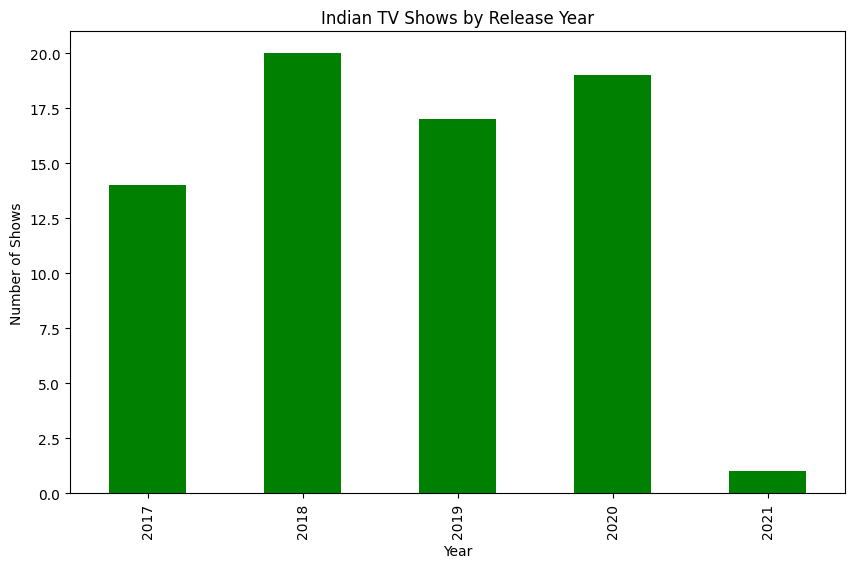

In [18]:
print("\nTV Shows released in India:")
indian_tv = data[(data['Country'] == 'India') & (data['Category'] == 'TV Show')]
indian_tv[['Title', 'Release_Date', 'Type']]

plt.figure(figsize=(10, 6))
indian_tv['Year'].value_counts().sort_index().plot(kind='bar', color='green')
plt.title('Indian TV Shows by Release Year')
plt.xlabel('Year')
plt.ylabel('Number of Shows')
plt.show()

# Top 10 Directors

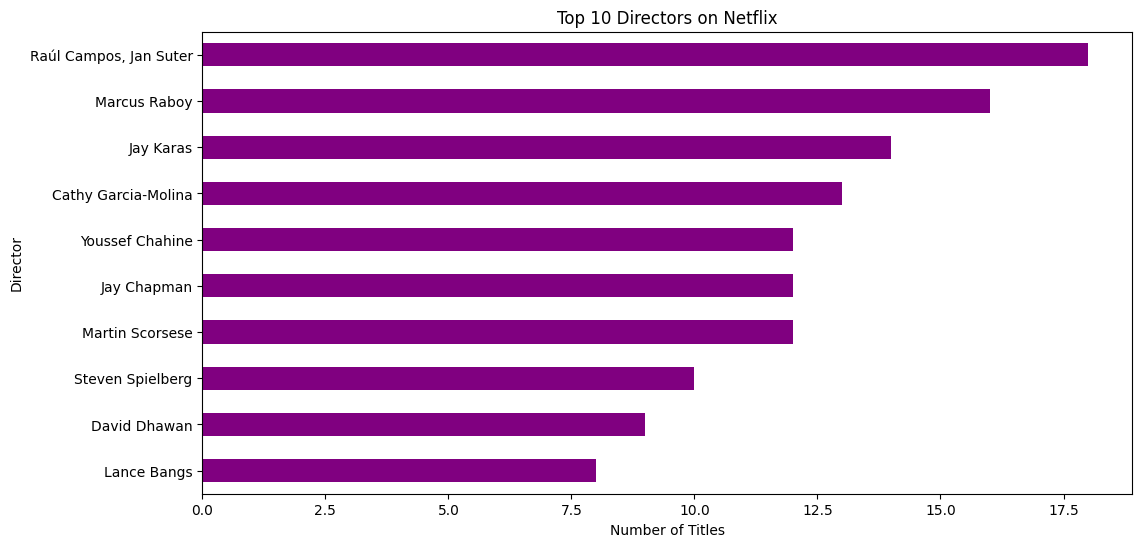

In [19]:
director_data = data[data['Director'] != "Unknown"]
top_directors = director_data['Director'].value_counts().head(10)
top_directors

plt.figure(figsize=(12, 6))
top_directors.plot(kind='barh', color='purple')
plt.title('Top 10 Directors on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.gca().invert_yaxis()
plt.show()

# Content Ratings 


Content Ratings:


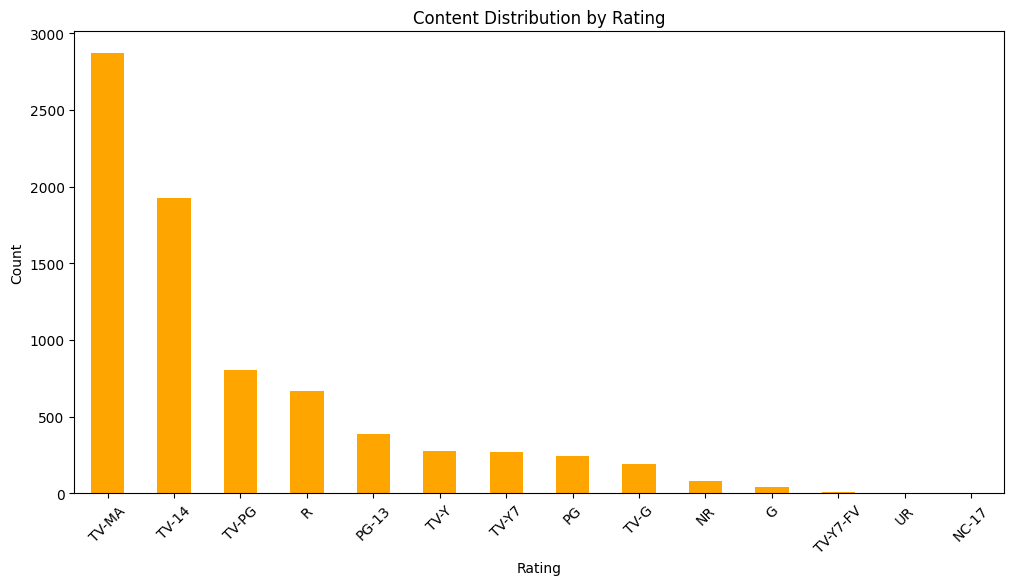

In [20]:
print("\nContent Ratings:")
ratings = data['Rating'].value_counts()
ratings

plt.figure(figsize=(12, 6))
ratings.plot(kind='bar', color='orange')
plt.title('Content Distribution by Rating')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Duration Analysis


Duration analysis:
Longest Movie: 312.0 minutes
TV Show with most seasons: 16.0 seasons


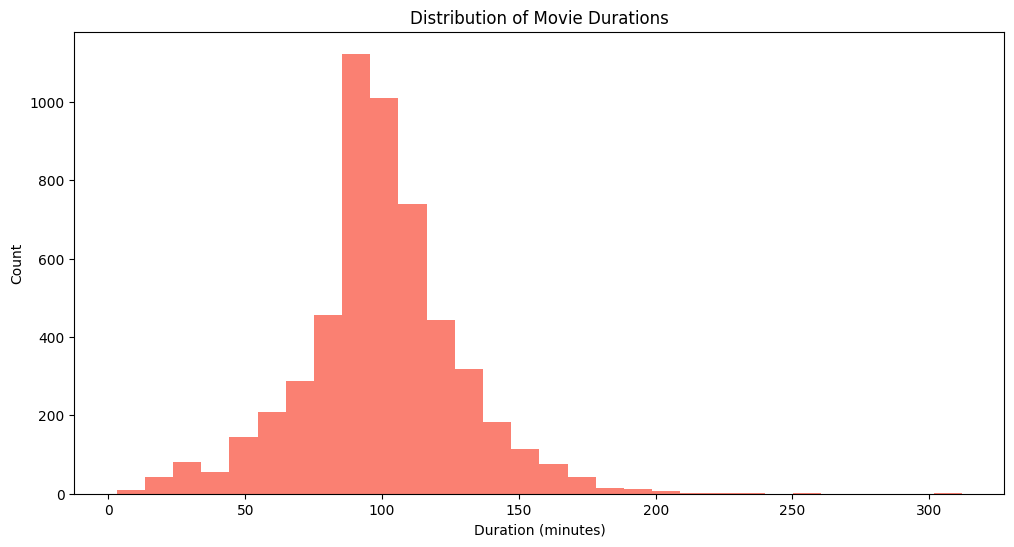

In [21]:
print("\nDuration analysis:")
movies = data[data['Category'] == 'Movie'].copy()
movies['Duration_min'] = movies['Duration'].str.extract(r'(\d+)').astype(float)

tv_shows = data[data['Category'] == 'TV Show'].copy()
tv_shows['Duration_seasons'] = tv_shows['Duration'].str.extract(r'(\d+)').astype(float)

print(f"Longest Movie: {movies['Duration_min'].max()} minutes")
print(f"TV Show with most seasons: {tv_shows['Duration_seasons'].max()} seasons")

plt.figure(figsize=(12, 6))
movies['Duration_min'].plot(kind='hist', bins=30, color='salmon')
plt.title('Distribution of Movie Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Count')
plt.show()

 # Country with most TV Shows

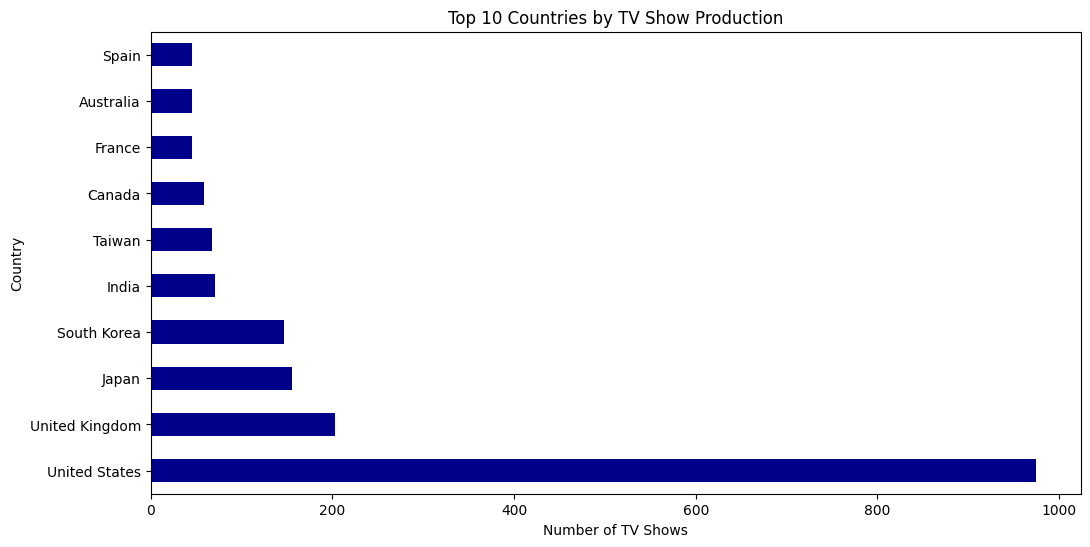

In [22]:
country_tv = data[data['Category'] == 'TV Show']['Country'].value_counts().head(10)
country_tv

plt.figure(figsize=(12, 6))
country_tv.plot(kind='barh', color='darkblue')
plt.title('Top 10 Countries by TV Show Production')
plt.xlabel('Number of TV Shows')
plt.ylabel('Country')
plt.show()

# Monthly release trends

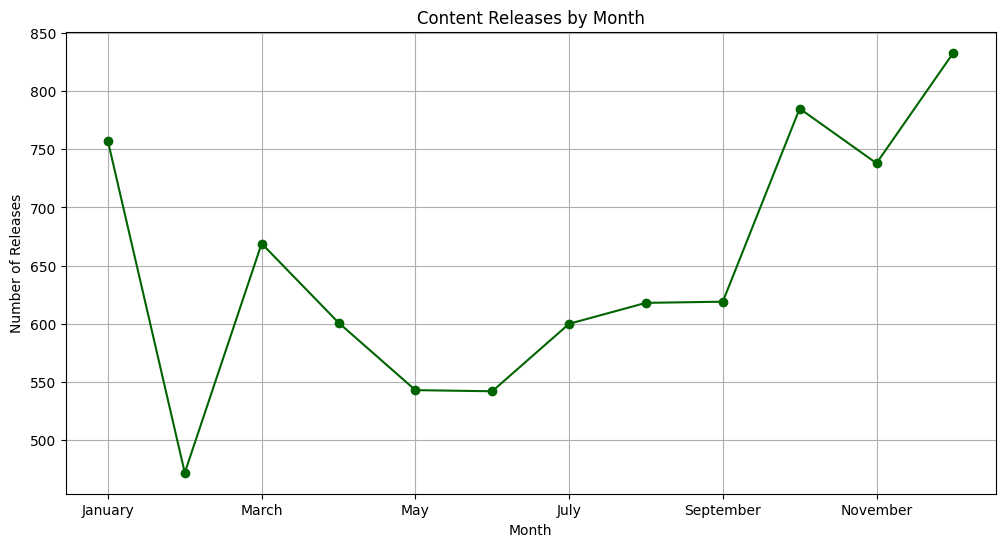

In [23]:
monthly_releases = data['Month'].value_counts()
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 
                'July', 'August', 'September', 'October', 'November', 'December']
monthly_releases = monthly_releases.reindex(months_order)

plt.figure(figsize=(12, 6))
monthly_releases.plot(kind='line', marker='o', color='darkgreen')
plt.title('Content Releases by Month')
plt.xlabel('Month')
plt.ylabel('Number of Releases')
plt.grid(True)
plt.show()

# Content by Country (Top 10)

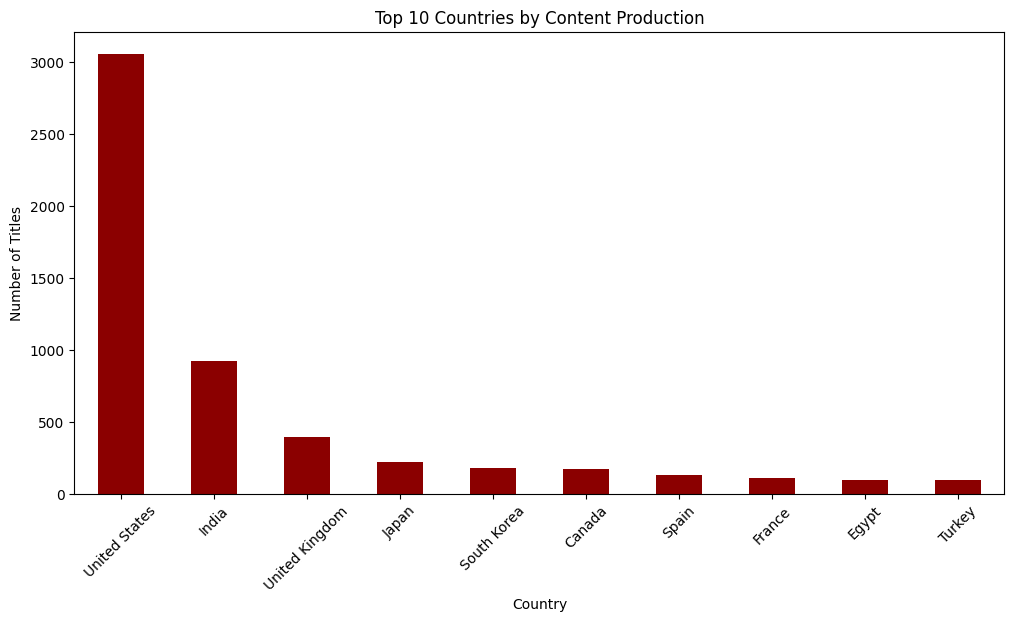

In [24]:
top_countries = data['Country'].value_counts().head(10)
top_countries

plt.figure(figsize=(12, 6))
top_countries.plot(kind='bar', color='darkred')
plt.title('Top 10 Countries by Content Production')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.show()

# Content Type Distribution by Rating

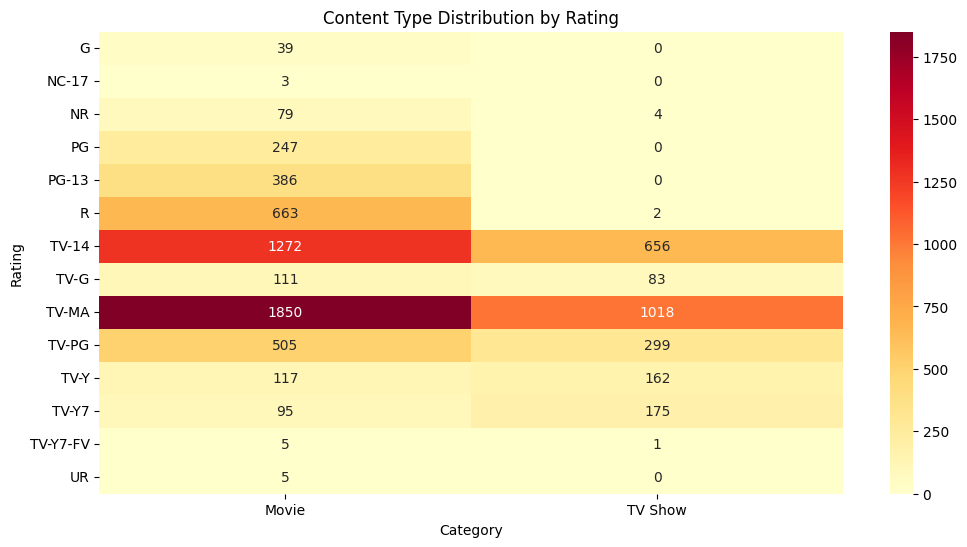

In [25]:
rating_by_type = pd.crosstab(data['Rating'], data['Category'])
rating_by_type

plt.figure(figsize=(12, 6))
sns.heatmap(rating_by_type, annot=True, fmt='d', cmap='YlOrRd')
plt.title('Content Type Distribution by Rating')
plt.xlabel('Category')
plt.ylabel('Rating')
plt.show()

# Duration vs Rating Analysis


Average Duration by Rating:


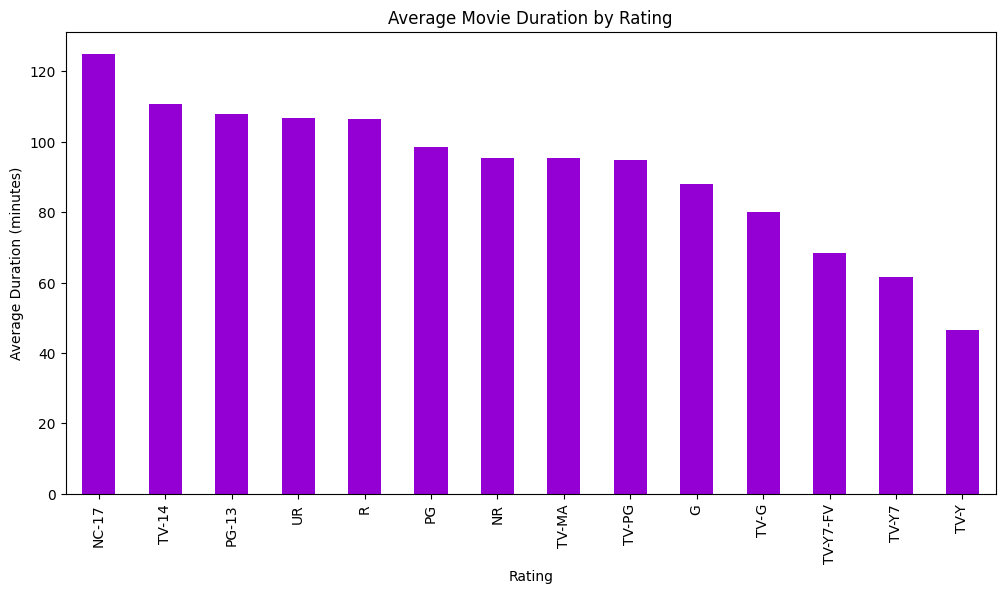

In [26]:
print("\nAverage Duration by Rating:")
if not movies.empty:
    duration_by_rating = movies.groupby('Rating')['Duration_min'].mean().sort_values(ascending=False)
    duration_by_rating

    plt.figure(figsize=(12, 6))
    duration_by_rating.plot(kind='bar', color='darkviolet')
    plt.title('Average Movie Duration by Rating')
    plt.xlabel('Rating')
    plt.ylabel('Average Duration (minutes)')
    plt.show()
else:
    print("No movie data available for duration analysis")